<a href="https://colab.research.google.com/github/HaHyunkyung/Prediction-of-disabled-call-taxi-waiting-time/blob/main/5_%EC%95%99%EC%83%81%EB%B8%94_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 로딩

In [ ]:
pip install numpy==1.23.5

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/장애인 콜택시 대기시간 예측/data4.csv')

In [ ]:
df.head()

,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,temp_max,...,season_Spring,season_Summer,season_Winter,boarding_rate,cancel_rate,high_wait_cancel,covid,wt_ma3,wt_ma5,taxi_base_rate
0,410,4085,3676,24.7,2230,8646,1,2015,21.2,-1.0,...,0,0,1,0.899878,6.659359e-08,2.696097e-09,0,21.200000,21.200000,3000
1,419,4030,3728,21.2,2231,8683,1,2015,21.8,-0.2,...,0,0,1,0.925062,6.656088e-08,3.139664e-09,0,21.500000,21.500000,3000
2,424,4167,3813,21.8,2215,8506,1,2015,41.2,3.2,...,0,0,1,0.915047,6.293753e-08,2.887043e-09,0,28.066667,28.066667,3000
3,215,1916,1645,41.2,2447,11123,1,2015,28.8,4.3,...,0,0,1,0.858559,3.172770e-07,7.700898e-09,0,30.600000,28.250000,3000
4,187,1700,1572,28.8,2419,10806,1,2015,23.2,2.3,...,0,0,1,0.924706,3.741955e-07,1.299290e-08,0,31.066667,27.240000,3000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_count              2916 non-null   int64  
 1   Register               2916 non-null   int64  
 2   Boarding               2916 non-null   int64  
 3   Wait_time              2916 non-null   float64
 4   Average_mean           2916 non-null   int64  
 5   Riding_mean            2916 non-null   int64  
 6   Month                  2916 non-null   int64  
 7   Year                   2916 non-null   int64  
 8   waiting_time           2916 non-null   float64
 9   temp_max               2916 non-null   float64
 10  temp_min               2916 non-null   float64
 11  rain(mm)               2916 non-null   float64
 12  humidity_max(%)        2916 non-null   float64
 13  humidity_min(%)        2916 non-null   float64
 14  sunshine(MJ/m2)        2916 non-null   float64
 15  mont

In [ ]:
df.describe()

,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,temp_max,...,season_Spring,season_Summer,season_Winter,boarding_rate,cancel_rate,high_wait_cancel,covid,wt_ma3,wt_ma5,taxi_base_rate
count,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,...,2916.000000,2916.000000,2916.000000,2916.000000,2.916000e+03,2.916000e+03,2916.000000,2916.000000,2916.000000,2916.000000
mean,418.919067,3928.127229,3285.638546,40.337037,2304.340535,9253.533265,6.533608,2018.505144,40.340261,18.110802,...,0.252401,0.252401,0.245199,0.841435,1.693903e-07,5.789747e-09,0.368999,40.335482,40.328888,3400.548697
std,133.719577,1509.300543,1248.972391,14.094318,107.382826,1020.053563,3.442829,2.287630,14.091722,10.691353,...,0.434464,0.434464,0.430279,0.052143,2.689161e-07,1.298537e-08,0.482616,12.663805,12.249351,400.068228
min,132.000000,527.000000,462.000000,17.600000,2131.000000,7672.000000,1.000000,2015.000000,17.600000,-11.200000,...,0.000000,0.000000,0.000000,0.596996,3.125192e-08,5.733788e-10,0.000000,18.100000,18.180000,3000.000000
25%,278.000000,2163.500000,1779.000000,29.700000,2228.000000,8519.000000,4.000000,2017.000000,29.700000,9.100000,...,0.000000,0.000000,0.000000,0.805897,4.638629e-08,1.007036e-09,0.000000,30.833333,31.055000,3000.000000
50%,455.000000,4722.500000,3935.000000,38.250000,2257.000000,8821.500000,7.000000,2019.000000,38.250000,19.700000,...,0.000000,0.000000,0.000000,0.845545,5.310766e-08,1.573009e-09,0.000000,39.000000,39.180000,3800.000000
75%,522.000000,5110.000000,4241.250000,48.700000,2401.000000,10151.000000,10.000000,2020.250000,48.700000,27.400000,...,1.000000,1.000000,0.000000,0.877657,2.637950e-07,5.858546e-09,1.000000,47.400000,47.400000,3800.000000
max,1413.000000,6182.000000,5189.000000,96.100000,2733.000000,14136.000000,12.000000,2022.000000,96.100000,39.400000,...,1.000000,1.000000,1.000000,0.968844,4.107215e-06,1.946547e-07,1.000000,92.733333,88.100000,3800.000000


### 데이터분할

In [ ]:
from sklearn.model_selection import train_test_split

target = 'waiting_time'
x = df.drop(target, axis = 1)
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(x_train)
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

### 모델링

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

### 1. ExtraTreesRegressor

MAE: 2.856244863013701
MAPE: 0.08132125743003905
R2: 0.8054732951744783


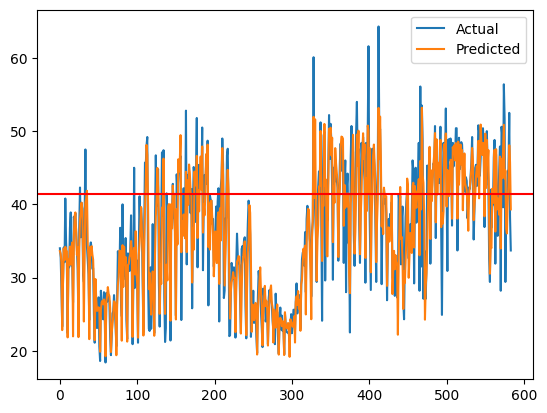

In [ ]:
EX_model = ExtraTreesRegressor(random_state=1)
EX_model.fit(x_train_sc, y_train)
y_pred = EX_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE = {}
result_MAPE = {}
result_r2 = {}
result_MAE['ExtraTreesRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['ExtraTreesRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['ExtraTreesRegressor'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
y_mean = y_train.mean()
plt.axhline(y_mean, color='r')
plt.show()

### 2. CatBoost

Learning rate set to 0.046804
0:	learn: 14.4625650	total: 63.3ms	remaining: 1m 3s
1:	learn: 13.9931925	total: 76ms	remaining: 37.9s
2:	learn: 13.5578229	total: 90.5ms	remaining: 30.1s
3:	learn: 13.1390206	total: 102ms	remaining: 25.5s
4:	learn: 12.7413187	total: 115ms	remaining: 22.8s
5:	learn: 12.3812578	total: 129ms	remaining: 21.4s
6:	learn: 12.0733365	total: 142ms	remaining: 20.1s
7:	learn: 11.7196692	total: 154ms	remaining: 19.1s
8:	learn: 11.4051846	total: 167ms	remaining: 18.4s
9:	learn: 11.0862857	total: 182ms	remaining: 18s
10:	learn: 10.8106684	total: 194ms	remaining: 17.4s
11:	learn: 10.5223816	total: 211ms	remaining: 17.3s
12:	learn: 10.2765266	total: 226ms	remaining: 17.1s
13:	learn: 10.0367301	total: 237ms	remaining: 16.7s
14:	learn: 9.8094470	total: 253ms	remaining: 16.6s
15:	learn: 9.5993396	total: 265ms	remaining: 16.3s
16:	learn: 9.4071556	total: 278ms	remaining: 16.1s
17:	learn: 9.2197648	total: 290ms	remaining: 15.8s
18:	learn: 9.0521742	total: 302ms	remaining: 15.6

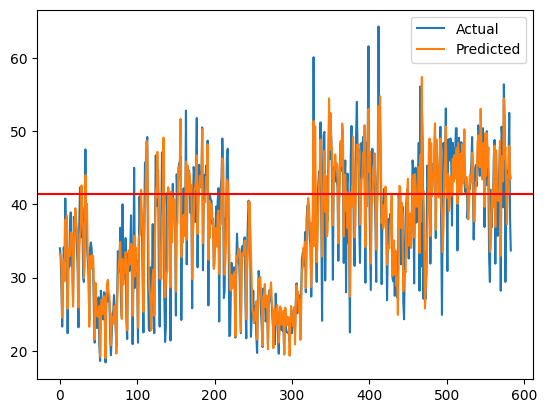

In [ ]:
cat_model = CatBoostRegressor()
cat_model.fit(x_train_sc, y_train)

y_pred = cat_model.predict(x_test_sc)

print('CatBoost MAE:', mean_absolute_error(y_test, y_pred))
print('CatBoost MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['catB'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['catB'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['catB'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
y_mean = y_train.mean()
plt.axhline(y_mean, color='r')
plt.show()

### 3. LGB

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Light MAE: 2.943763772746257
Light MAPE: 0.08670987025672819
R2: 0.7932895314351337
평균 : 41.34819897084048


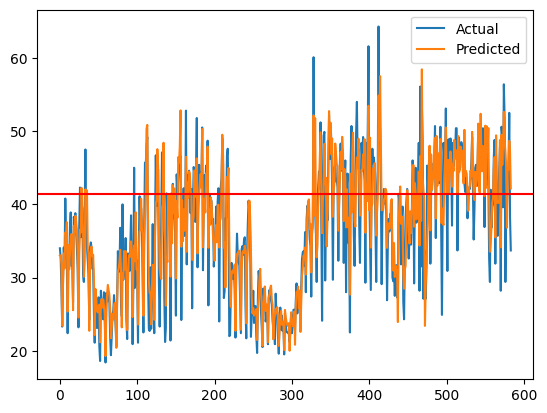

In [ ]:
lg_model = LGBMRegressor(max_depth=5, verbose=-1)

lg_model.fit(x_train_sc, y_train)

y_pred = lg_model.predict(x_test_sc)

print('Light MAE:', mean_absolute_error(y_test, y_pred))
print('Light MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['LGB'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['LGB'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['LGB'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r')
plt.show()

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

base_models = [
    ('cat', CatBoostRegressor(verbose=0, random_state=1)),
    ('lgb', LGBMRegressor(random_state=1)),
    ('extra', ExtraTreesRegressor(random_state=1))
]

stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())


stacking_model.fit(x_train_sc, y_train)

y_pred = stacking_model.predict(x_test_sc)
print('Stacking MAE:', mean_absolute_error(y_test, y_pred))
print('Stacking MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('Stacking R2:', r2_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Stacking MAE: 2.8723212537051963
Stacking MAPE: 0.08186236272704812
Stacking R2: 0.8089431046534605


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.ensemble import VotingRegressor

cat_model = CatBoostRegressor(verbose=0, random_state=1)
lgb_model = LGBMRegressor(random_state=1)
ex_model = ExtraTreesRegressor(random_state=1)

voting_model = VotingRegressor(estimators=[
    ('cat', cat_model),
    ('lgb', lgb_model),
    ('extra', ex_model)
])

voting_model.fit(x_train_sc, y_train)

y_pred = voting_model.predict(x_test_sc)
print('Voting MAE:', mean_absolute_error(y_test, y_pred))
print('Voting MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('Voting R2:', r2_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Voting MAE: 2.7766434887132956
Voting MAPE: 0.08004153772538655
Voting R2: 0.8159221091840726


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
cat_model.fit(x_train_sc, y_train)
lgb_model.fit(x_train_sc, y_train)
ex_model.fit(x_train_sc, y_train)

y_pred_cat = cat_model.predict(x_test_sc)
y_pred_lgb = lgb_model.predict(x_test_sc)
y_pred_ex = ex_model.predict(x_test_sc)

y_pred_weighted = (0.1 * y_pred_cat) + (0.3 * y_pred_lgb) + (0.6 * y_pred_ex)

print('Weighted Averaging MAE:', mean_absolute_error(y_test, y_pred_weighted))
print('Weighted Averaging MAPE:', mean_absolute_percentage_error(y_test, y_pred_weighted))
print('Weighted Averaging R2:', r2_score(y_test, y_pred_weighted))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Weighted Averaging MAE: 2.7672331969358903
Weighted Averaging MAPE: 0.07940879151350573
Weighted Averaging R2: 0.8156981614407325


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
